## Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

* Problem Statement:
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly. 

* Data : https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [50]:
#Importing Necessary Packages
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from plotly.offline import init_notebook_mode,iplot
import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
df.rename(columns = {'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':"Spending_Score"}, inplace = True)

In [53]:
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [54]:
df.drop(["CustomerID"],inplace=True,axis=1)

In [61]:
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### There are no NA or Null values, The Average Age is 38-40 and the Average Income is 60.56 Thousands

In [56]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Visualizing to get better grasp of the data.

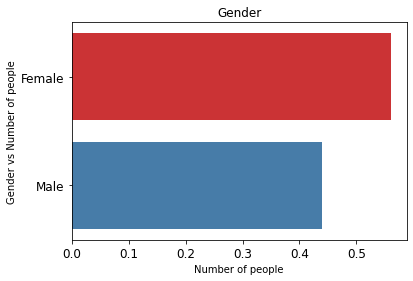

In [57]:
edu = df["Gender"].value_counts(normalize=True)

sns.barplot(edu.values, edu.index, palette='Set1')
plt.title('Gender')
plt.xlabel('Number of people')
plt.ylabel('Gender vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

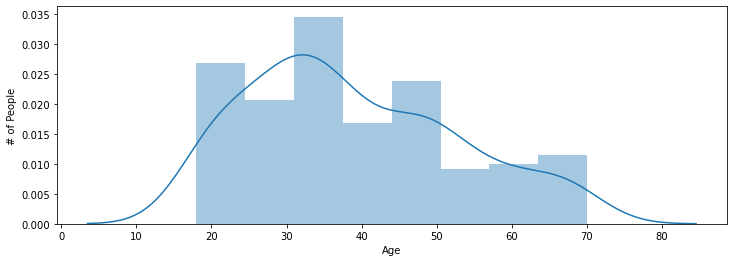

In [58]:
plt.figure(figsize=(12,4))

sns.distplot(df['Age'])
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('# of People')
plt.show()

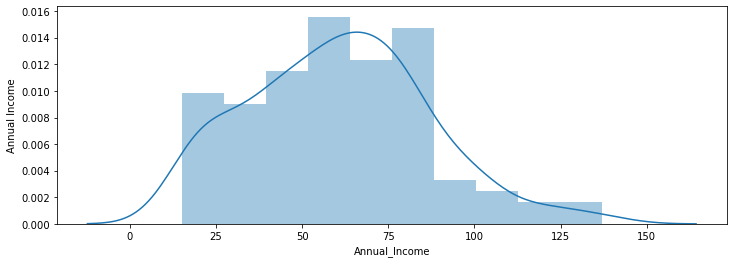

In [60]:
plt.figure(figsize=(12,4))

sns.distplot(df['Annual_Income'])
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('Annual Income')
plt.show()

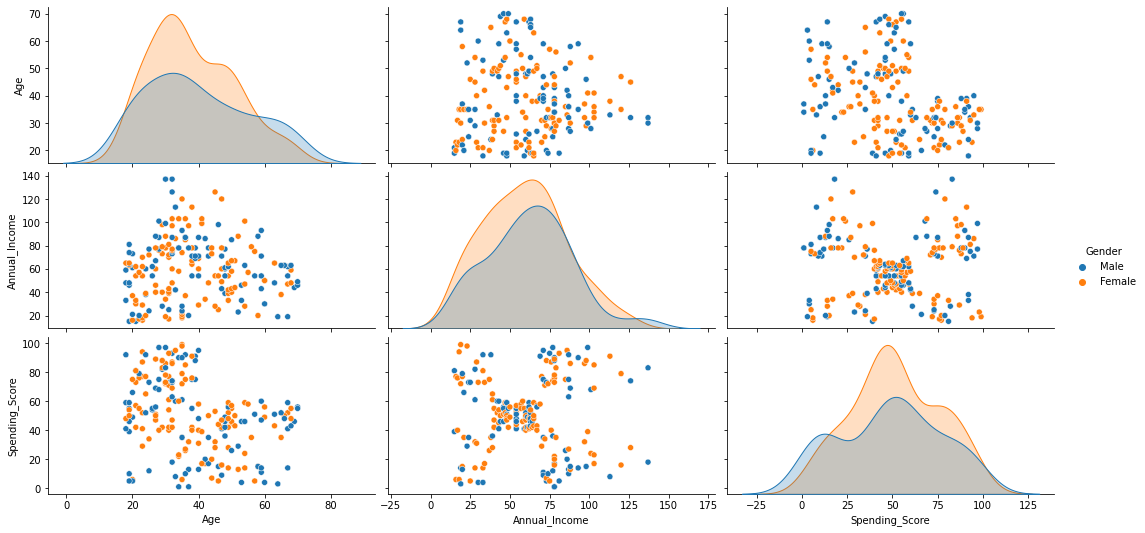

In [90]:
sns.pairplot(df, hue = "Gender", aspect=2)

In [62]:
df_1 = df.copy()
df_1["Gender"] = df_1["Gender"].replace({"Male":0,"Female":1})

In [63]:
df_1

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


### 1. Scaling the Data:
     
     This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. 
     You want to scale data when you're using methods based on measures of how far apart data points, like 
     support vector machines, or SVM or k-nearest neighbors, or KNN.
     
     1.Using Standard Scalar : Data Normalization:
                
    Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.This can be thought of as subtracting the mean value or centering the data.
Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.
Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

            
    A value is standardized as follows:

    y = (x – mean) / standard_deviation

Info from: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [64]:
# Scaling:
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df_1)

In [65]:
min(df_scaled[0]), max(df_scaled[0]) 

(-1.7389991930659485, -0.43480147996914814)

## K-Means:

The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares.

In [67]:
wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(df_scaled)            
  wcss_1.append(kmeans.inertia_)  

In [68]:
print(wcss_1) 

[800.0, 588.8026767824936, 476.7875544135158, 388.65179447444933, 325.6827904073892, 275.07937111631736, 243.87850872118588, 199.71662559667672, 174.1930957085769]


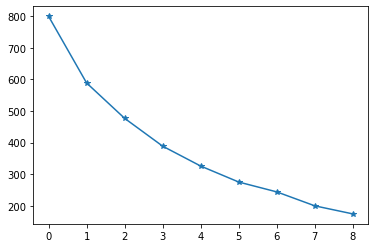

In [69]:
plt.plot(wcss_1, '-*')  

In [91]:
kmeans = KMeans(n_clusters=4)           
kmeans.fit(df_scaled)         
labels = kmeans.labels_

In [92]:
labels, len(labels)  

(array([1, 1, 0, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 1,
        0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 3, 1, 0, 2, 0, 2, 0, 2, 0, 1, 3, 2,
        0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 0, 0, 3, 1,
        0, 0, 1, 2, 3, 0, 0, 0, 3, 1, 0, 3, 2, 0, 3, 1, 3, 0, 2, 3, 0, 2,
        2, 0, 0, 1, 3, 0, 2, 1, 0, 2, 3, 1, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3,
        3, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 3, 1, 3, 1, 3, 1,
        2, 2, 3, 2, 0, 1, 3, 2, 0, 1, 2, 2, 3, 1, 3, 2, 0, 1, 3, 1, 0, 2,
        0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 0, 1, 3, 1, 3, 1, 0, 2,
        3, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 1, 0, 2, 0, 2, 3, 2, 0, 2, 0, 1,
        3, 1], dtype=int32),
 200)

In [93]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([55, 40, 57, 48]))

In [94]:
clusters = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
clusters

,Gender,Age,Annual_Income,Spending_Score
0,0.886405,0.664494,-0.066484,-0.598558
1,-1.128152,-0.760727,0.054964,0.833693
2,0.886405,-0.747192,-0.034098,0.678764
3,-1.128152,0.759830,0.070868,-0.814929


In [95]:
clusters = scaler.inverse_transform(clusters)
clusters = pd.DataFrame(data = clusters, columns = [df.columns])
clusters

,Gender,Age,Annual_Income,Spending_Score
0,1.0,48.109091,58.818182,34.781818
1,0.0,28.250000,62.000000,71.675000
2,1.0,28.438596,59.666667,67.684211
3,0.0,49.437500,62.416667,29.208333


In [96]:
df_2 = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1) 
df_2.head()

,Gender,Age,Annual_Income,Spending_Score,cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,2


In [97]:
df_3 = pd.concat([df_1, pd.DataFrame({'cluster': labels})], axis = 1) 

In [98]:
figure = px.scatter_3d(df_3,
                    color='cluster',
                    x="Age",
                    y="Spending_Score",
                    z="Gender",            
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}                    
                    )
figure.update_layout()
figure.show()

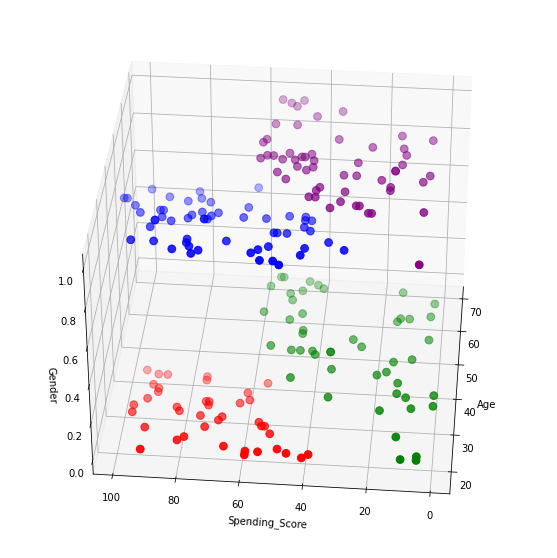

In [99]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_3.Age[df_3.cluster == 0], df_3["Spending_Score"][df_3.cluster == 0], df_3["Gender"][df_3.cluster == 0], c='purple', s=60)
ax.scatter(df_3.Age[df_3.cluster == 1], df_3["Spending_Score"][df_3.cluster == 1], df_3["Gender"][df_3.cluster == 1], c='red', s=60)
ax.scatter(df_3.Age[df_3.cluster == 2], df_3["Spending_Score"][df_3.cluster == 2], df_3["Gender"][df_3.cluster == 2], c='blue', s=60)
ax.scatter(df_3.Age[df_3.cluster == 3], df_3["Spending_Score"][df_3.cluster == 3], df_3["Gender"][df_3.cluster == 3], c='green', s=60)
#ax.scatter(df_3.Age[df_3.cluster == 4], df_3["Spending_Score"][df_3.cluster == 4], df_3["Gender"][df_3.cluster == 4], c='yellow', s=60)

ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Spending_Score")
ax.set_zlabel('Gender')
plt.show()